In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
!ls

 Beer_Dataset2.csv		        Presentation
'Data Preprocessing.ipynb'	       'Previous Work'
'Feature Engineering Selection.ipynb'


In [8]:
beer = pd.read_csv("Beer_Dataset2.csv")

In [9]:
beer

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,7,8,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1
0,0,8.620,99.92455,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,10563.466360,61628.838770,32102.036150,16036.452060,19583.034290,34839.586910,24215.574190,26847.195870,7615.993482,14507.788630
1,1,2.028,99.92456,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,120646.935400,79366.881980,43035.822300,37163.403620,36872.356070,59943.191070,15221.700980,0.000000,60552.112660
2,2,1.623,99.92460,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,875.384277,85265.579840,67347.691220,55966.669410,60228.257280,14277.948450,26484.025280,28578.299010,1237.980317,48038.121160
3,3,9.128,99.92467,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,16156.162390,113575.834700,52652.490790,65286.116680,30642.027650,89657.372260,116968.968500,27727.737190,17851.978290,44653.332550
4,4,8.925,99.92481,Unknown,[M-H]-,NaN,0.03,True,NaN,NaN,...,21890.798440,100697.304100,43298.215030,34068.225520,24606.922880,75265.668770,26663.392210,52700.087160,18222.944900,15594.820940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,10810,2.738,986.31675,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,0.000000,5378.062563,9291.234846,4720.779080,4633.164994,7999.560728,13120.698450,6758.874942,0.000000,6570.677826
10811,10811,3.245,987.50137,w/o MS2: Hederagenin base + O-dHex-Hex-Hex,[M-H]-,NaN,0.01,True,6.9,987.51392,...,0.000000,2953.232074,5512.150894,2113.845978,3088.989266,2839.170389,10628.574660,2357.221854,0.000000,2371.273309
10812,10812,2.333,990.29031,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,0.000000,5393.739901,2709.341208,1203.474892,767.478226,1649.083713,512.948664,13472.807120,0.000000,3648.060895
10813,10813,2.840,991.33838,Unknown,[M-H]-,NaN,0.14,True,NaN,NaN,...,0.000000,8818.918344,10795.305250,11375.458300,9576.179240,28849.763260,5447.103743,13892.908920,0.000000,7960.345000


In [10]:
beer.isnull().sum()

Alignment ID       0
Average Rt(min)    0
Average Mz         0
Metabolite name    0
Adduct type        0
                  ..
4.1                0
5.1                0
6.1                0
7.1                0
8.1                0
Length: 122, dtype: int64

In [11]:
beer.columns

Index(['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name',
       'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned',
       'Reference RT', 'Reference m/z',
       ...
       '7', '8', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1'],
      dtype='object', length=122)

# Removing excess columns that are not needed for the current analysis

In [12]:
#dropping unnecessary columns

beer.drop('1.1', inplace=True, axis=1)
beer.drop('2.1', inplace=True, axis=1)
beer.drop('3.1', inplace=True, axis=1)
beer.drop('4.1', inplace=True, axis=1)
beer.drop('5.1', inplace=True, axis=1)
beer.drop('6.1', inplace=True, axis=1)
beer.drop('7.1', inplace=True, axis=1)
beer.drop('8.1', inplace=True, axis=1)
beer.drop('1', inplace=True, axis=1)
beer.drop('2', inplace=True, axis=1)
beer.drop('3', inplace=True, axis=1)
beer.drop('4', inplace=True, axis=1)
beer.drop('5', inplace=True, axis=1)
beer.drop('6', inplace=True, axis=1)
beer.drop('7', inplace=True, axis=1)
beer.drop('8', inplace=True, axis=1)

columns_to_drop = ['Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'Comment', 'Manually modified for annotation', 'Manually modified for quantification','Isotope tracking parent ID', 'Isotope tracking weight number', 'RT similarity', 'm/z similarity','Simple dot product','Weighted dot product','Reverse dot product','Matched peaks count','Matched peaks percentage','Total score','S/N average','Spectrum reference file name','MS1 isotopic spectrum','MS/MS spectrum', 'Alignment ID']  # List of column names to drop
beer = beer.drop(columns=columns_to_drop)


# Sample Names and Features only remaining in the dataset

In [13]:
beer

,C_All_QC1,C_All_QC2,C_BLD_1,C_BLD_2,C_BLD_QC,C_GER_1,C_GER_2,C_GER_3,C_GER_4,C_GER_5,...,B_SOU_1,B_SOU_2,B_SOU_QC,B_STU_1,B_STU_2,B_STU_QC,B_Water,B_WHE_1,B_WHE_2,B_WHE_QC
0,14285,70286,74725,94139,61199,86427,77152,96598,98106,93064,...,73719,89146,74013,28299,33737,95728,5178,76578,65488,79130
1,0,168078,97020,177158,169194,167099,175199,96188,184790,94333,...,62209,118909,59463,2817,8898,0,0,126048,69649,78440
2,0,97993,101905,67187,50003,105860,91105,311865,106703,97070,...,72732,71136,64766,506,4056,0,0,81025,75504,118071
3,23503,125571,129359,141997,131331,130056,132522,135759,136604,173657,...,138518,117891,166974,39029,56986,28977,3533,109281,118129,114948
4,19943,106607,112249,175515,112077,137850,114639,119590,120960,126641,...,98157,106562,101819,110164,151687,32366,9005,96784,102383,100782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,21723,5497,15012,585,8519,9754,14434,6748,11305,10892,...,12505,29202,17793,14726,7862,6355,0,2404,885,8111
10811,12596,8671,0,0,566,0,11574,0,0,0,...,8653,0,16576,0,2209,1795,0,3128,6292,916
10812,3022,5616,3517,679,0,0,0,0,0,1844,...,0,1546,0,3243,2985,6378,0,7053,0,2866
10813,34593,26920,35914,275,26585,6385,26056,34514,1425,27827,...,9596,1243,558,25771,25472,23963,0,14421,13217,20525


In [14]:
#checking for missing values
beer.isnull().sum()

C_All_QC1    0
C_All_QC2    0
C_BLD_1      0
C_BLD_2      0
C_BLD_QC     0
            ..
B_STU_QC     0
B_Water      0
B_WHE_1      0
B_WHE_2      0
B_WHE_QC     0
Length: 71, dtype: int64

# Beer Sample Abbreiviations
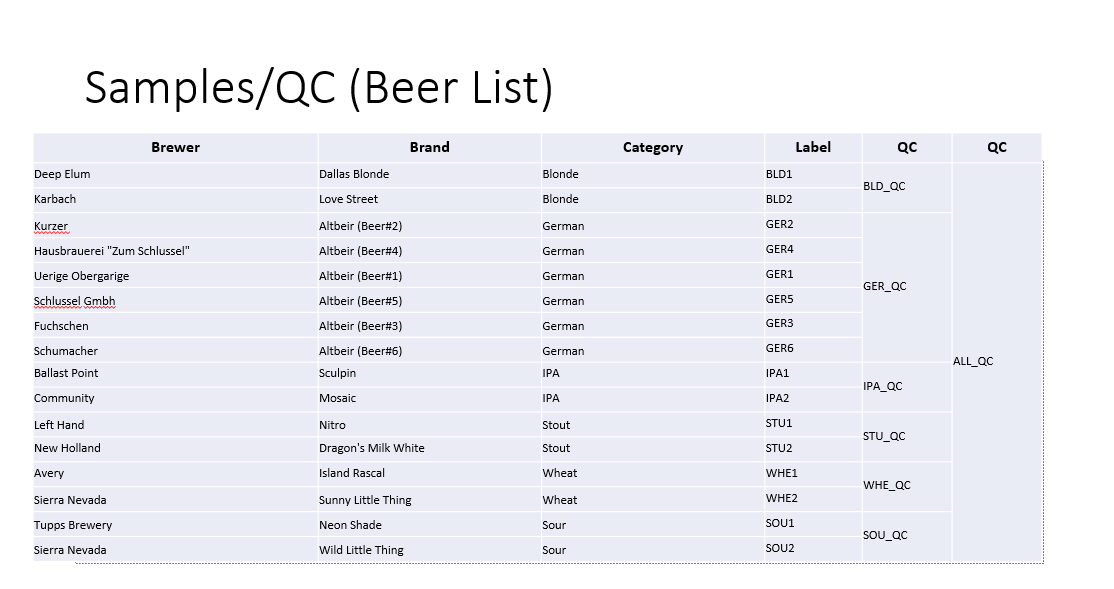

In [15]:
#transposing the dataset
beer = beer.T

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [16]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

#e minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


       Feature Index  Min Feature Value  Max Feature Value
0                  1                  0             263763
1                  2                  0             311865
2                  3               3533             453340
3                  4               9005             255091
4                  5               7359             405495
...              ...                ...                ...
10809          10810                  0              37995
10810          10811                  0              27790
10811          10812                  0              39930
10812          10813                  0              93989
10813          10814                  0              38603

[10814 rows x 3 columns]


In [17]:
import pandas as pd

# Reset the index to include the sample names as a regular column
beer = beer.reset_index()
beer = beer.rename(columns={'index': 'Sample'})

In [18]:
beer.head()

,Sample,0,1,2,3,4,5,6,7,8,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,14285,0,0,23503,19943,44285,21736,0,0,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,70286,168078,97993,125571,106607,140786,116265,174589,284981,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,74725,97020,101905,129359,112249,144078,121089,358711,181429,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,94139,177158,67187,141997,175515,50697,228039,178905,264800,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,61199,169194,50003,131331,112077,145360,121956,159002,232005,...,0,0,5363,0,31380,8519,566,0,26585,0


In [19]:
import pandas as pd

# Assuming 'beer' is your DataFrame
beer['Abbreviation'] = beer['Sample'].str[2:5]  # Adjust the indexing based on your actual data

# Define a mapping between abbreviations and classes
abbreviation_mapping = {
    'BLD': 'Blonde',
    'GER': 'German',
    'IPA': 'IPA',
    'STU': 'Stout',
    'WHE': 'Wheat',
    'SOU': 'Sour',
}

# Create a 'Class' column based on the mapping
beer['Class'] = beer['Abbreviation'].map(abbreviation_mapping)

# Assign 'water' class for samples with 'water' in the 'Sample' name
beer.loc[beer['Sample'].str.contains('Water'), 'Class'] = 'Water'

# Assign 'All' class for samples with 'All' in the 'Sample' name
beer.loc[beer['Sample'].str.contains('All'), 'Class'] = 'All'

# Fill remaining 'N/A' values
beer['Class'].fillna('N/A', inplace=True)

# Reorder columns
beer = beer[['Sample', 'Abbreviation', 'Class'] + list(beer.columns[1:-2])]



In [20]:
import pandas as pd
# Adding whether a sample is a QC sample
beer['Is_QC'] = beer['Sample'].str.contains('QC').astype(int)
# Reorder columns to have 'Is_QC' at the beginning
beer = beer[['Sample', 'Is_QC'] + [col for col in beer.columns if col not in ['Sample', 'Is_QC']]]

In [21]:
print(beer['Is_QC'].unique())
print(beer['Abbreviation'].unique())
print(beer['Class'].unique())
print(beer['Sample'].unique())

[1 0]
['All' 'BLD' 'GER' 'IPA' 'SOU' 'STU' 'Wat' 'WHE']
['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
['C_All_QC1' 'C_All_QC2' 'C_BLD_1' 'C_BLD_2' 'C_BLD_QC' 'C_GER_1'
 'C_GER_2' 'C_GER_3' 'C_GER_4' 'C_GER_5' 'C_GER_6' 'C_GER_QC' 'C_IPA_1'
 'C_IPA_2' 'C_IPA_QC' 'C_SOU_1' 'C_SOU_2' 'C_SOU_QC' 'C_STU_1' 'C_STU_2'
 'C_STU_QC' 'C_Water' 'C_WHE_1' 'C_WHE_2' 'C_WHE_QC' 'A_BLD_1' 'A_BLD_2'
 'A_BLD_QC' 'A_GER_1' 'A_GER_2' 'A_GER_3' 'A_GER_4' 'A_GER_5' 'A_GER_6'
 'A_GER_QC' 'A_IPA_1' 'A_IPA_2' 'A_IPA_QC' 'A_SOU_1' 'A_SOU_2' 'A_SOU_QC'
 'A_STU_1' 'A_STU_2' 'A_WHE_1' 'A_WHE_2' 'A_WHE_QC' 'B_All_QC1'
 'B_All_QC2' 'B_BLD_1' 'B_BLD_2' 'B_BLD_QC' 'B_GER_1' 'B_GER_2' 'B_GER_3'
 'B_GER_4' 'B_GER_5' 'B_GER_6' 'B_GER_QC' 'B_IPA_1' 'B_IPA_2' 'B_IPA_QC'
 'B_SOU_1' 'B_SOU_2' 'B_SOU_QC' 'B_STU_1' 'B_STU_2' 'B_STU_QC' 'B_Water'
 'B_WHE_1' 'B_WHE_2' 'B_WHE_QC']


In [22]:
unique_classes = beer['Class'].unique()
num_classes = len(unique_classes)
print(unique_classes)
print("Number of classes:", num_classes)

['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
Number of classes: 8


In [23]:
beer.drop(columns=['Abbreviation'], inplace=True)


In [24]:
beer

,Sample,Is_QC,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,14285,0,0,23503,19943,44285,21736,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,70286,168078,97993,125571,106607,140786,116265,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,Blonde,74725,97020,101905,129359,112249,144078,121089,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,Blonde,94139,177158,67187,141997,175515,50697,228039,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,Blonde,61199,169194,50003,131331,112077,145360,121956,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,Stout,95728,0,0,28977,32366,25930,30662,...,0,0,27888,0,23537,6355,1795,6378,23963,0
67,B_Water,0,Water,5178,0,0,3533,9005,8202,3511,...,0,0,0,0,0,0,0,0,0,0
68,B_WHE_1,0,Wheat,76578,126048,81025,109281,96784,119715,103349,...,0,0,23226,0,902,2404,3128,7053,14421,4169
69,B_WHE_2,0,Wheat,65488,69649,75504,118129,102383,127892,110958,...,0,0,18736,0,1089,885,6292,0,13217,0


# The Class column contains several unique beer classes, including 'All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Water', and 'Wheat'. 'All' and 'Water' are not actua classes but rather control or reference categories. 'All' should be excluded since it could skew the analysis if treated as a separate class.


In [25]:
beer.isnull().sum()

Sample    0
Is_QC     0
Class     0
0         0
1         0
         ..
10810     0
10811     0
10812     0
10813     0
10814     0
Length: 10818, dtype: int64

In [26]:
beer.index

RangeIndex(start=0, stop=71, step=1)

In [27]:
beer.to_csv('beer_ds.csv', index=False)

In [29]:
cleaned_beer_ds = pd.read_csv("beer_ds.csv")

In [30]:
cleaned_beer_ds

,Sample,Is_QC,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,14285,0,0,23503,19943,44285,21736,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,70286,168078,97993,125571,106607,140786,116265,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,Blonde,74725,97020,101905,129359,112249,144078,121089,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,Blonde,94139,177158,67187,141997,175515,50697,228039,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,Blonde,61199,169194,50003,131331,112077,145360,121956,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,Stout,95728,0,0,28977,32366,25930,30662,...,0,0,27888,0,23537,6355,1795,6378,23963,0
67,B_Water,0,Water,5178,0,0,3533,9005,8202,3511,...,0,0,0,0,0,0,0,0,0,0
68,B_WHE_1,0,Wheat,76578,126048,81025,109281,96784,119715,103349,...,0,0,23226,0,902,2404,3128,7053,14421,4169
69,B_WHE_2,0,Wheat,65488,69649,75504,118129,102383,127892,110958,...,0,0,18736,0,1089,885,6292,0,13217,0
